In [1]:
import pandas as pd

In [2]:
df = {
    'species':['ck',
               'co',
               'cm',
               'pink',
               'so',
               'stl',
               'ct',
               'rbt'],
    'eye_size':['large',
                'large',
                'medium',
                'medium',
                'very large',
                'small',
                'small',
                'small'],
    'snout_shape':['pointy',
                   'short and blunt',
                   'NA',
                   'NA',
                   'NA',
                   'short and rounded',
                   'long and pointy',
                   'short and rounded'],
    'parr_marks':['slightly faded',
                  'slightly faded',
                  'faded',
                  'NA',
                  'slightly faded',
                  'faded',
                  'faded',
                  'NA'],
    'parr_marks_length':['long',
                         'long',
                         'short',
                         'NA',
                         'irregular',
                         'short',
                         'short',
                         'short'],
    'spotting_density':['medium',
                        'medium',
                        'medium',
                        'NA',
                        'NA',
                        'high',
                        'high',
                        'high'],
    'fin_type':['anal fin',
                'anal fin',
                'caudal fin',
                'caudal fin',
                'caudal fin',
                'caudal fin',
                'caudal fin',
                'caudal fin']

}

unique = pd.DataFrame(df)

In [3]:
unique

,species,eye_size,snout_shape,parr_marks,parr_marks_length,spotting_density,fin_type
0,ck,large,pointy,slightly faded,long,medium,anal fin
1,co,large,short and blunt,slightly faded,long,medium,anal fin
2,cm,medium,NA,faded,short,medium,caudal fin
3,pink,medium,NA,NA,NA,NA,caudal fin
4,so,very large,NA,slightly faded,irregular,NA,caudal fin
5,stl,small,short and rounded,faded,short,high,caudal fin
6,ct,small,long and pointy,faded,short,high,caudal fin
7,rbt,small,short and rounded,NA,short,high,caudal fin


In [4]:
df = pd.read_csv('/content/field.csv')
df.head()

,watershed,river,site,method,local,water_temp_start,fork_length_mm,species
0,puntledge,puntledge,little mexico,beach seine,marine,13.2,88.0,ck
1,puntledge,puntledge,little mexico,beach seine,marine,13.2,88.0,ck
2,puntledge,puntledge,little mexico,beach seine,marine,13.2,89.0,ck
3,puntledge,puntledge,little mexico,beach seine,marine,13.2,89.0,ck
4,puntledge,puntledge,little mexico,beach seine,marine,13.2,89.0,ck


In [5]:
full = df.merge(unique, how='left',on='species')

In [6]:
full.isna().sum()

watershed                0
river                    0
site                     0
method                2428
local                 2901
water_temp_start     22572
fork_length_mm         105
species                  0
eye_size                 0
snout_shape              0
parr_marks               0
parr_marks_length        0
spotting_density         0
fin_type                 0
dtype: int64

In [7]:
full['method'].value_counts()

method
rst            27540
beach seine    18030
smolt trap     10511
wolf trap       3760
g-trap             1
Name: count, dtype: int64

In [8]:
full['species'].value_counts()

species
ck     31810
co     27187
stl     1765
rbt      979
ct       515
cm        10
so         4
Name: count, dtype: int64

### **Pros and cons of using Deterministic vs Probabilistic approach**



*   Pro:
* The model is not trainable
* The lack of data for some species doesn't affect the model's accuracy



---




*   Con:
* The model is not very linient to outlier data



### **Deterministic approach**

In [9]:
uniques = unique.sample(10000, replace=True)

In [10]:
def one_hot_encoding(df,col,prefix):
  df = df.copy()
  dummies = pd.get_dummies(df[col],prefix=col,dtype='int')
  df = pd.concat([df,dummies],axis=1)
  df = df.drop(col,axis=1)

  return df

In [11]:
for col in uniques.columns:
  if col != 'species':
    uniques = one_hot_encoding(uniques,col,col)

In [12]:
uniques

,species,eye_size_large,eye_size_medium,eye_size_small,eye_size_very large,snout_shape_NA,snout_shape_long and pointy,snout_shape_pointy,snout_shape_short and blunt,snout_shape_short and rounded,...,parr_marks_slightly faded,parr_marks_length_NA,parr_marks_length_irregular,parr_marks_length_long,parr_marks_length_short,spotting_density_NA,spotting_density_high,spotting_density_medium,fin_type_anal fin,fin_type_caudal fin
1,co,1,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,1,0
2,cm,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
3,pink,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
5,stl,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
4,so,0,0,0,1,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,ct,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1,co,1,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,1,0
5,stl,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
7,rbt,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1


In [13]:
from sklearn.model_selection import train_test_split

X = uniques.drop('species',axis=1)
y = uniques['species']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

In [14]:
y.unique()

array(['co', 'cm', 'pink', 'stl', 'so', 'rbt', 'ct', 'ck'], dtype=object)

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(max_depth=9)

dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9)

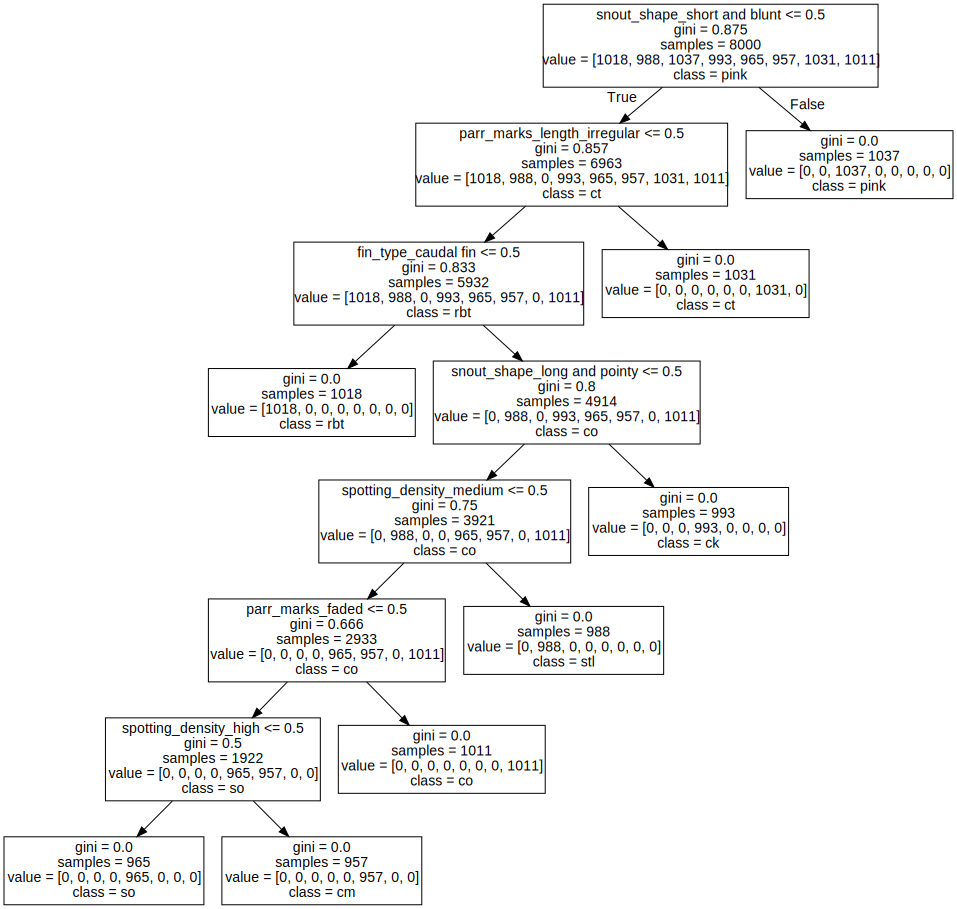

In [16]:
import graphviz
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dot_data = tree.export_graphviz(dt, feature_names=X_train.columns,class_names=y_train.unique(), out_file=None)
graph = graphviz.Source(dot_data)
graph

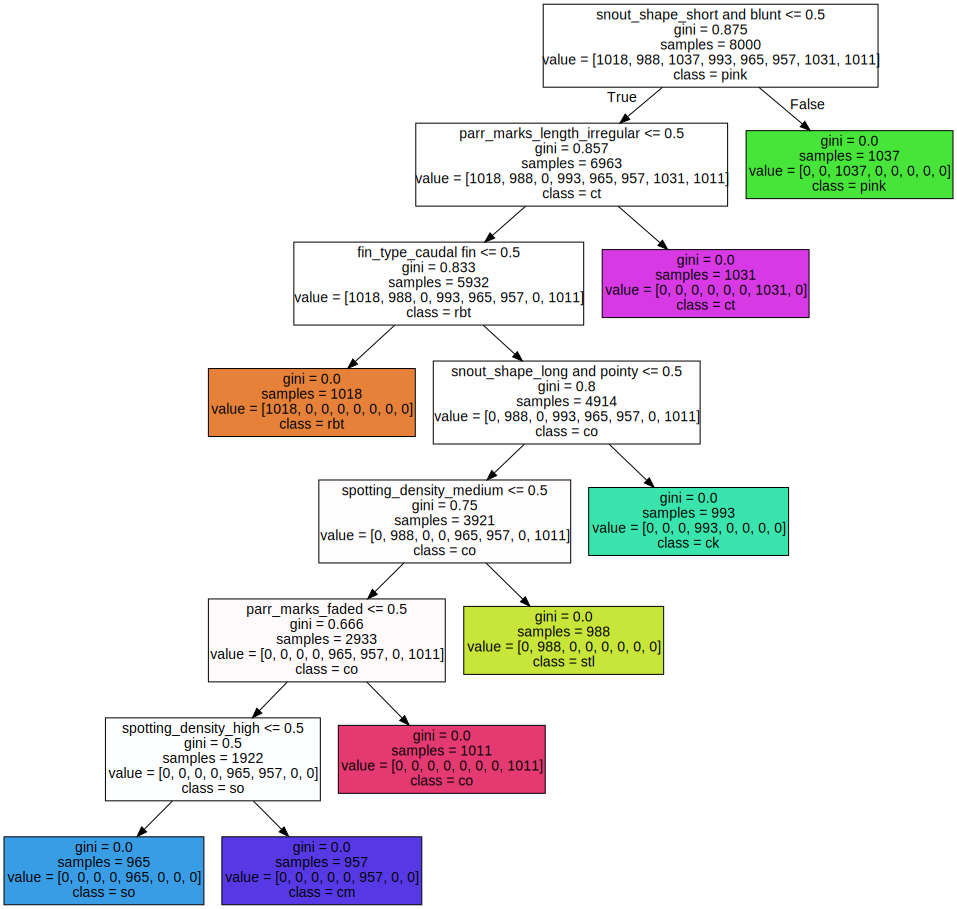

In [17]:
class_names = y_train.unique().astype(str)

pastel_colors = [
    "#FFB3BA",
    "#FFDFBA",
    "#FFFFBA",
    "#BAFFC9",
    "#BAE1FF",
    "#D7BAFF",
    "#BAFFEB",
    "#FFCACB"
]


class_colors = {key:value for key, value in zip(class_names,pastel_colors)}

def add_class_colors(dot_data, class_colors):
    lines = dot_data.split('\n')
    for i, line in enumerate(lines):
        if 'value = ' in line:
            for cls, color in class_colors.items():
                if f'value = {cls}' in line:
                    lines[i] = line.replace(']', f', style=filled, fillcolor="{color}"]')
    return '\n'.join(lines)

dot_data = tree.export_graphviz(dt, feature_names=X_train.columns, class_names=class_names, out_file=None, filled=True)
dot_data_colored = add_class_colors(dot_data, class_colors)
graph = graphviz.Source(dot_data_colored)

output_file = 'decision_tree_colored_by_class'
graph.render(filename=output_file, format='png', cleanup=True)
graph